In [1]:
from pkg.utils_companies import *
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
raw = read_json_file('../data/raw_data/spa_clinics_rank.json')
data = raw['data']

### Checking variability in ranks

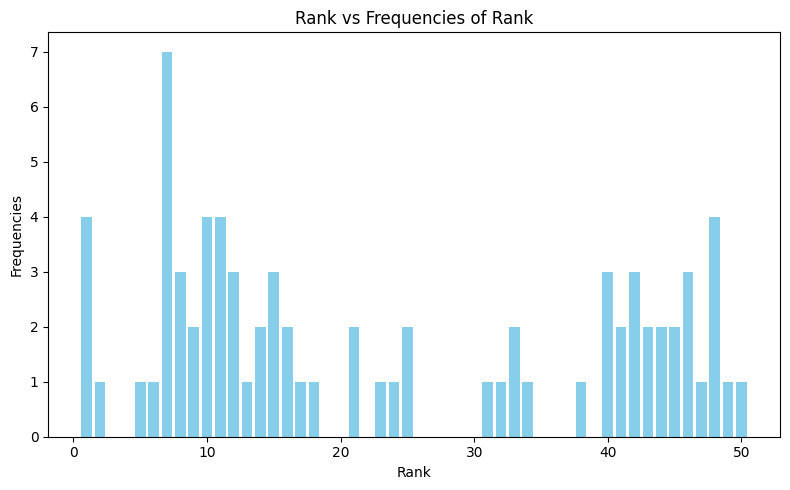

In [3]:
ranks = Counter([company['rank'] for company in data])
plt.figure(figsize=(8, 5))
plt.bar(list(ranks.keys()), list(ranks.values()), color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Frequencies')
plt.title(f'Rank vs Frequencies of Rank')
plt.tight_layout()
plt.show()


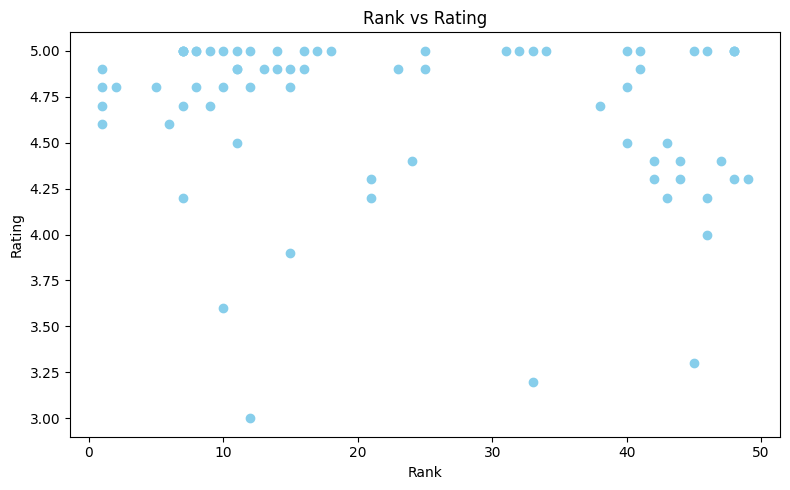

In [4]:
rank_rating = [(company['rank'],company['reviews']['rating']) for company in data if company['reviews']]
ranks = [item[0] for item in rank_rating]
rating = [item[1] for item in rank_rating]
plt.figure(figsize=(8, 5))
plt.scatter(ranks, rating, color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Rating')
plt.title(f'Rank vs Rating')
plt.tight_layout()
plt.show()


In [5]:
import spacy
import Levenshtein
nlp = spacy.load("en_core_web_lg")

In [22]:
identity_count = sum(1 for item in data if item['identity'])
print(f"There are {identity_count} companies in the data with identity information.")

There are 19 companies in the data with identity information.


In [24]:
def has_keyword(keyword: str, identities: list)->bool:
    target_token = nlp(keyword)[0]
    docs = [nlp(identity) for identity in identities]
    for doc in docs:
        for token in doc:
            if token.similarity(target_token)>=0.9 or Levenshtein.distance(keyword, token.lemma_)<=2:
                return True
    return False

def count_identity(keyword: str, data):
    keyword_owned = []
    for i in range(len(data)):
        if data[i]['reviews'] and data[i]['identity']:
            if has_keyword(keyword,data[i]['identity']):
                keyword_owned.append((data[i]['rank'],data[i]['reviews']['rating']))
    return keyword_owned

In [28]:
women = count_identity('women', data)
lgbt = count_identity('lgbt', data)
print(f"Women => Count: {len(women)}, Average Ranking: {sum([item[0] for item in women])/len(women):.2f}, Average Rating: {sum(item[1] for item in women)/len(women):.2f}")
print(f"Lgbt => Count: {len(lgbt)}, Average Ranking: {sum([item[0] for item in lgbt])/len(women):.2f}, Average Rating: {sum(item[1] for item in lgbt)/len(lgbt):.2f}")

Women => Count: 9, Average Ranking: 16.33, Average Rating: 4.92
Lgbt => Count: 4, Average Ranking: 6.00, Average Rating: 4.88
